# Read data from the Bucket(s)

In [7]:
import xarray as xr
import s3fs
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))

In [8]:
s3.ls('escience2022/Antoine/')

['escience2022/Antoine/.keep',
 'escience2022/Antoine/AMSR-E_ASI_sea_ice_concentration',
 'escience2022/Antoine/AMSR-E_ASI_snow',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration',
 'escience2022/Antoine/AMSR2_ASI_snow',
 'escience2022/Antoine/ESA_SMOS_Arctic_Sea_Surface_Salinity',
 'escience2022/Antoine/Satellite_Arctic_DMS']

In [9]:
s3.ls('escience2022/Antoine/AMSR-E_ASI_snow')

['escience2022/Antoine/AMSR-E_ASI_snow/2002',
 'escience2022/Antoine/AMSR-E_ASI_snow/2003',
 'escience2022/Antoine/AMSR-E_ASI_snow/2004',
 'escience2022/Antoine/AMSR-E_ASI_snow/2005',
 'escience2022/Antoine/AMSR-E_ASI_snow/2006',
 'escience2022/Antoine/AMSR-E_ASI_snow/2007',
 'escience2022/Antoine/AMSR-E_ASI_snow/2008',
 'escience2022/Antoine/AMSR-E_ASI_snow/2009',
 'escience2022/Antoine/AMSR-E_ASI_snow/2010',
 'escience2022/Antoine/AMSR-E_ASI_snow/2011']

In [12]:
s3.ls( 'escience2022/Antoine/AMSR2_ASI_snow')

['escience2022/Antoine/AMSR2_ASI_snow/2012',
 'escience2022/Antoine/AMSR2_ASI_snow/2013',
 'escience2022/Antoine/AMSR2_ASI_snow/2014',
 'escience2022/Antoine/AMSR2_ASI_snow/2015',
 'escience2022/Antoine/AMSR2_ASI_snow/2016',
 'escience2022/Antoine/AMSR2_ASI_snow/2017',
 'escience2022/Antoine/AMSR2_ASI_snow/2018',
 'escience2022/Antoine/AMSR2_ASI_snow/AMSR-2_snowdepth_2012.zip',
 'escience2022/Antoine/AMSR2_ASI_snow/AMSR-2_snowdepth_2013.zip',
 'escience2022/Antoine/AMSR2_ASI_snow/AMSR-2_snowdepth_2014.zip',
 'escience2022/Antoine/AMSR2_ASI_snow/AMSR-2_snowdepth_2015.zip',
 'escience2022/Antoine/AMSR2_ASI_snow/AMSR-2_snowdepth_2016.zip',
 'escience2022/Antoine/AMSR2_ASI_snow/AMSR-2_snowdepth_2017.zip',
 'escience2022/Antoine/AMSR2_ASI_snow/AMSR-2_snowdepth_2018.zip']

## CMIP6 data

In [7]:
dir = 'escience2022/Ada/monthly'
files = [file for file in s3.ls(dir) if 'dms' in file ]
files

['escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_historical_r1i1p1f2_gn_185001-201412.nc',
 'escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_omip1_r1i1p1f2_gn_170001-194912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_omip1_r1i1p1f2_gn_195001-200912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_185001-185912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_186001-186912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_187001-187912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_188001-188912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_189001-189912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_190001-190912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_191001-191912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_192001-192912.nc',
 'escience2022/Ada/mon

## Load one file as an xarray dataset

In [10]:
# path to the file: bucket/forlder/filename.nc
s3file = 's3://escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_207001-207112.nc'
file = s3.open(s3file)
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:             (time: 24, bnds: 2, j: 385, i: 360, vertices: 4)
Coordinates:
  * time                (time) object 2070-01-16 12:00:00 ... 2071-12-16 12:0...
  * j                   (j) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384 385
  * i                   (i) int32 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360
    latitude            (j, i) float64 ...
    longitude           (j, i) float64 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object ...
    vertices_latitude   (j, i, vertices) float64 ...
    vertices_longitude  (j, i, vertices) float64 ...
    dmsos               (time, j, i) float32 ...
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               OMIP
    branch_method:             no parent
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     0.0
    ...                        ...
    title:                     NorESM2-LM output prepared for CMIP6
    variable_id:               dmsos
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/5e802875-dce2-4469-acd2-a2c2d862abdc

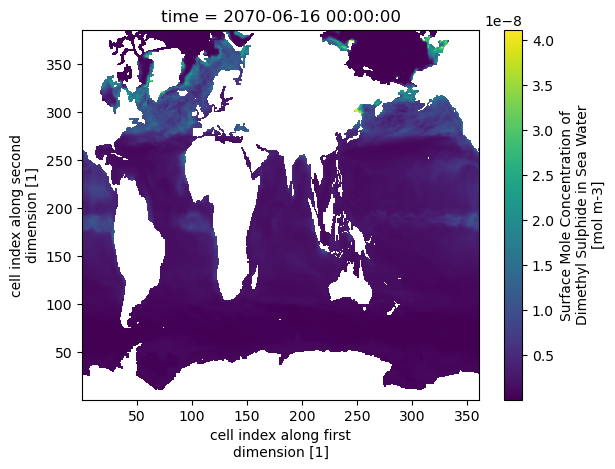

In [12]:
ds.dmsos.isel(time=5).plot()

## Iterate through multiple files to create a fileset and load into xarray dataset

In [33]:
remote_files = 's3://escience2022/Ada/monthly/chlos_Omon_CESM2_esm-ssp585_r1i1p1f1_gn_*.nc'
remote_files = s3.glob(remote_files)
remote_files

['escience2022/Ada/monthly/chlos_Omon_CESM2_esm-ssp585_r1i1p1f1_gn_201501-206412.nc',
 'escience2022/Ada/monthly/chlos_Omon_CESM2_esm-ssp585_r1i1p1f1_gn_206501-210012.nc']

In [34]:
# Iterate through remote_files to create a fileset
fileset = [s3.open(file) for file in remote_files]
ds = xr.open_mfdataset(fileset, combine='by_coords')
ds

<xarray.Dataset>
Dimensions:    (time: 1032, nlat: 384, nlon: 320, d2: 2, vertices: 4)
Coordinates:
    lat        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    lon        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * nlat       (nlat) int32 1 2 3 4 5 6 7 8 ... 377 378 379 380 381 382 383 384
  * nlon       (nlon) int32 1 2 3 4 5 6 7 8 ... 313 314 315 316 317 318 319 320
  * time       (time) object 2015-01-15 13:00:00.000007 ... 2100-12-15 12:00:00
Dimensions without coordinates: d2, vertices
Data variables:
    chlos      (time, nlat, nlon) float32 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    time_bnds  (time, d2) object dask.array<chunksize=(600, 2), meta=np.ndarray>
    lat_bnds   (time, nlat, nlon, vertices) float32 dask.array<chunksize=(600, 384, 320, 4), meta=np.ndarray>
    lon_bnds   (time, nlat, nlon, vertices) float32 dask.array<chunksize=(600, 384, 320, 4), meta=np.ndarray>
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            C4MIP
    branch_method:          standard
    branch_time_in_child:   735110.0
    branch_time_in_parent:  735110.0
    case_id:                1525
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/4f91d14c-027d-47e7-a6d7-65f374e152af
    variable_id:            chlos
    variant_info:           CMIP6 esm-ssp585 experiments (2015-2100) with CAM...
    variant_label:          r1i1p1f1